<a href="https://colab.research.google.com/github/TeneikaAskew/BudgetHighlights/blob/main/Clicked_Demo_Budget_Highlights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/Shared drives/Projects/Clicked'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Shared drives/Projects/Clicked


In [ ]:
# prompt: write a script to mount my google drive folder

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Change directory to the desired folder within Google Drive
%cd '/content/drive/My Drive/Colab Notebooks'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


# Install PDF Packages

In [ ]:
!pip install PyMuPDF

In [ ]:
import os
import requests
import fitz  # PyMuPDF

In [ ]:
# Define the URL of the PDF file
pdf_url = "https://www.secnav.navy.mil/fmc/fmb/Documents/23pres/Highlights_Book.pdf"

# Define the folder to save the PDF file
folder_path = "/content/drive/Shared drives/Projects/Clicked/"

# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Generate the file name from the URL
file_name = os.path.basename(pdf_url)

# Construct the full file path
file_path = os.path.join(folder_path, file_name)

In [ ]:
file_url="https://www.secnav.navy.mil/fmc/fmb/Documents/23pres/Highlights_Book.pdf"
r = requests.get(file_url, stream = True)
# Increase the chunk size for faster download (e.g., 8192 bytes)
chunk_size = 8192

In [ ]:
from tqdm import tqdm
path1= "/content/drive/Shared drives/Projects/Clicked/dHighlights_Book.pdf"
with requests.get(file_url, stream=True) as response:
    length = int(response.headers['Content-Length'])
    print("Content Size/Total:",length)
    response.raise_for_status()
    with open(path1, "wb") as file:
        bar = tqdm(total=length)
        for chunk in response.iter_content(chunk_size=chunk_size):
            if chunk:
                file.write(chunk)
                bar.update(len(chunk))

Content Size/Total: 245


  0%|          | 0/245 [00:00<?, ?it/s]

In [ ]:
# Open the downloaded PDF file
with fitz.open(file_path) as pdf_document:
    # Extract text from each page and concatenate it
    text = ""
    for page_num in range(pdf_document.page_count):
        page = pdf_document.load_page(page_num)
        text += page.get_text()

    # Print the extracted text
    print("Extracted text from the PDF:", text)


Extracted text from the PDF: The BOTTOM LINE  
https://www.secnav.navy.mil/fmc/fmb/Pages/Fiscal-Year-2023.aspx 
   
 
  Deputy Assistant Secretary of the Navy (Budget) 
Fiscal Year 2023 Department of the Navy Budget Submission 
The Department of the Navy’s (DON) FY 2023 President’s Budget (PB23) request is $230.8B, an increase of $9.1B from the 
FY 2022 enacted budget (with supplementals).  The budget is aligned with the draft National Security Strategy and defense 
priorities.  It resources a Navy and Marine Corps Team that supports Secretary Austin’s vision of integrated deterrence, 
campaigning, and building enduring advantages, with an agile and ready joint force.  Moreover, Secretary of the Navy Del 
Toro’s enduring priorities of strengthening maritime dominance in defense of our nation, empowering our warfighters, and 
strengthening strategic partnerships is nested under this guidance and resourced to achieve these effects. 
Soundly aligned with strategy, the budget implements co

# Text Pre-Processing

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
sentences = nltk.sent_tokenize(text)
print(sentences)
len(sentences)

['The BOTTOM LINE  \nhttps://www.secnav.navy.mil/fmc/fmb/Pages/Fiscal-Year-2023.aspx \n   \n \n  Deputy Assistant Secretary of the Navy (Budget) \nFiscal Year 2023 Department of the Navy Budget Submission \nThe Department of the Navy’s (DON) FY 2023 President’s Budget (PB23) request is $230.8B, an increase of $9.1B from the \nFY 2022 enacted budget (with supplementals).', 'The budget is aligned with the draft National Security Strategy and defense \npriorities.', 'It resources a Navy and Marine Corps Team that supports Secretary Austin’s vision of integrated deterrence, \ncampaigning, and building enduring advantages, with an agile and ready joint force.', 'Moreover, Secretary of the Navy Del \nToro’s enduring priorities of strengthening maritime dominance in defense of our nation, empowering our warfighters, and \nstrengthening strategic partnerships is nested under this guidance and resourced to achieve these effects.', 'Soundly aligned with strategy, the budget implements concepts a

1324

In [ ]:
import pandas as pd
# Create a DataFrame to store the sentences
df_sentences = pd.DataFrame(sentences, columns=['Sentence'])

In [ ]:
# Display the DataFrame
print(df_sentences)

                                               Sentence
0     The BOTTOM LINE  \nhttps://www.secnav.navy.mil...
1     The budget is aligned with the draft National ...
2     It resources a Navy and Marine Corps Team that...
3     Moreover, Secretary of the Navy Del \nToro’s e...
4     Soundly aligned with strategy, the budget impl...
...                                                 ...
1319  RDTEN funding in FY \n2023 continues to accele...
1320  Strengthening Strategic Partnerships – Climate...
1321  2022  \nAppropriation Tables \n \n \nFY 2023 D...
1322  FY 2021\nFY 2022\nFY 2023\n_2/ FY 2021 does no...
1323  2022  \nAppropriation Tables \n \n \nFY 2023 D...

[1324 rows x 1 columns]


In [ ]:
# Preprocess text
text = text.lower()
text = re.sub(r'\W', ' ', text)
text = re.sub(r'\s+', ' ', text)
tokens = nltk.word_tokenize(text)
tokens = [word for word in tokens if word not in stopwords.words('english')]
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(word) for word in tokens]

# Show a snippet of processed tokens
print(tokens[:100])

['bottom', 'line', 'http', 'www', 'secnav', 'navy', 'mil', 'fmc', 'fmb', 'page', 'fiscal', 'year', '2023', 'aspx', 'deputy', 'assistant', 'secretary', 'navy', 'budget', 'fiscal', 'year', '2023', 'department', 'navy', 'budget', 'submission', 'department', 'navy', 'fy', '2023', 'president', 'budget', 'pb23', 'request', '230', '8b', 'increase', '9', '1b', 'fy', '2022', 'enacted', 'budget', 'supplementals', 'budget', 'aligned', 'draft', 'national', 'security', 'strategy', 'defense', 'priority', 'resource', 'navy', 'marine', 'corp', 'team', 'support', 'secretary', 'austin', 'vision', 'integrated', 'deterrence', 'campaigning', 'building', 'enduring', 'advantage', 'agile', 'ready', 'joint', 'force', 'moreover', 'secretary', 'navy', 'del', 'toro', 'enduring', 'priority', 'strengthening', 'maritime', 'dominance', 'defense', 'nation', 'empowering', 'warfighters', 'strengthening', 'strategic', 'partnership', 'nested', 'guidance', 'resourced', 'achieve', 'effect', 'soundly', 'aligned', 'strategy',

<img src="https://www.nlplanet.org/course-practical-nlp/_images/stemming_vs_lemmatization.png">

In [ ]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)  # Return as string for better readability in DataFrame

In [ ]:
# Pre-load stopwords and lemmatizer to improve efficiency
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Sentence Segmentation
Split the extracted text into sentences.

In [ ]:
# Apply the preprocess function to each row in the 'Sentence' column
df_sentences['Preprocessed'] = df_sentences['Sentence'].apply(preprocess)

# Display the DataFrame to see the results
df_sentences

,Sentence,Preprocessed
0,The BOTTOM LINE \nhttps://www.secnav.navy.mil...,bottom line http www secnav navy mil fmc fmb p...
1,The budget is aligned with the draft National ...,budget aligned draft national security strateg...
2,It resources a Navy and Marine Corps Team that...,resource navy marine corp team support secreta...
3,"Moreover, Secretary of the Navy Del \nToro’s e...",moreover secretary navy del toro enduring prio...
4,"Soundly aligned with strategy, the budget impl...",soundly aligned strategy budget implement conc...
...,...,...
1319,RDTEN funding in FY \n2023 continues to accele...,rdten funding fy 2023 continues accelerate sup...
1320,Strengthening Strategic Partnerships – Climate...,strengthening strategic partnership climate 20...
1321,2022 \nAppropriation Tables \n \n \nFY 2023 D...,2022 appropriation table fy 2023 department na...
1322,FY 2021\nFY 2022\nFY 2023\n_2/ FY 2021 does no...,fy 2021 fy 2022 fy 2023 _2 fy 2021 include 407...


https://www.nlplanet.org/course-practical-nlp/01-intro-to-nlp/05-tokenization-stemming-lemmatization

# Sentence Classification
Creating a classifier based on a pre-trained model or simple heuristics to classify sentences

In [ ]:
data = [
    ("The budget allocates $500 million to naval research and development.", "Research"),
    ("An increase in health insurance subsidies for veterans is proposed.", "Healthcare"),
    ("Funding for aircraft and equipment procurement is set to increase by 20%.", "Defense"),
    ("Educational grants for service members are to be expanded.", "Education"),
    ("Plans to renovate public transportation infrastructure have been approved.", "Infrastructure"),
    ("New legislation aims to improve data privacy and security for all citizens.", "Legislation"),
    ("Government increases funding for renewable energy projects to reduce carbon emissions.", "Environment"),
    ("A rise in funding for mental health services to support community well-being.", "Healthcare"),
    ("The introduction of a bill to support small businesses with tax breaks.", "Economic Development"),
    ("Expansion of free internet access to low-income households announced.", "Technology"),
    ("Increased investment in space exploration technology.", "Research"),
    ("New regulations for pharmaceutical pricing to ensure affordability.", "Healthcare"),
    ("Subsidies for agricultural development are expected to boost food production.", "Agriculture"),
    ("A proposal to enhance veteran benefits and services.", "Veteran Affairs"),
    ("Budget cuts are expected in the arts and culture sector.", "Arts"),
    ("Enhancements in cybersecurity measures for national defense.", "Defense"),
    ("Increased grants for scientific research in universities.", "Education"),
    ("Implementation of stricter emissions standards for automobiles.", "Environment"),
    ("Development of new public parks and recreational facilities.", "Infrastructure"),
    ("Reforms in immigration law expected to streamline processing.", "Legislation")
     # Add more examples
]

exampleCategoriesdf = pd.DataFrame(data, columns=['Sentence', 'Category'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform([text])

In [ ]:
exampleCategoriesdf

,Sentence,Category
0,The budget allocates $500 million to naval res...,Research
1,An increase in health insurance subsidies for ...,Healthcare
2,Funding for aircraft and equipment procurement...,Defense
3,Educational grants for service members are to ...,Education
4,Plans to renovate public transportation infras...,Infrastructure
5,New legislation aims to improve data privacy a...,Legislation
6,Government increases funding for renewable ene...,Environment
7,A rise in funding for mental health services t...,Healthcare
8,The introduction of a bill to support small bu...,Economic Development
9,Expansion of free internet access to low-incom...,Technology


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

X_test = df_sentences['Preprocessed']

# Split data into training and test sets - we don't need to do this since it we have 2 different data sets
X_train, X_test, y_train, y_test = train_test_split(exampleCategoriesdf['Sentence'], exampleCategoriesdf['Category'], test_size=0.2, random_state=42)

# Create a text classification pipeline
pipeline = make_pipeline(
    TfidfVectorizer(),
    LogisticRegression()
)

# Train the model - use this if there is only 1 data set
# X_train, y_train = train_df['Sentence'], train_df['Category']
# pipeline.fit(X_train, y_train)
# Predict on the test data
#y_pred = pipeline.predict(X_test)

In [ ]:
X_train

8     The introduction of a bill to support small bu...
5     New legislation aims to improve data privacy a...
11    New regulations for pharmaceutical pricing to ...
3     Educational grants for service members are to ...
18    Development of new public parks and recreation...
16    Increased grants for scientific research in un...
13    A proposal to enhance veteran benefits and ser...
2     Funding for aircraft and equipment procurement...
9     Expansion of free internet access to low-incom...
19    Reforms in immigration law expected to streaml...
4     Plans to renovate public transportation infras...
12    Subsidies for agricultural development are exp...
7     A rise in funding for mental health services t...
10    Increased investment in space exploration tech...
14    Budget cuts are expected in the arts and cultu...
6     Government increases funding for renewable ene...
Name: Sentence, dtype: object

In [ ]:
y_train

8     Economic Development
5              Legislation
11              Healthcare
3                Education
18          Infrastructure
16               Education
13         Veteran Affairs
2                  Defense
9               Technology
19             Legislation
4           Infrastructure
12             Agriculture
7               Healthcare
10                Research
14                    Arts
6              Environment
Name: Category, dtype: object

In [ ]:
# Train the model using the entire training dataset (exampleCategoriesdf)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [ ]:
X_test

0     The budget allocates $500 million to naval res...
17    Implementation of stricter emissions standards...
15    Enhancements in cybersecurity measures for nat...
1     An increase in health insurance subsidies for ...
Name: Sentence, dtype: object

In [ ]:
y_test #actual labels

0        Research
17    Environment
15        Defense
1      Healthcare
Name: Category, dtype: object

In [ ]:
# Predict on new, unseen preprocessed text from df_sentences
X_test = df_sentences['Preprocessed']
y_pred = pipeline.predict(X_test)

In [ ]:
X_test

0       bottom line http www secnav navy mil fmc fmb p...
1       budget aligned draft national security strateg...
2       resource navy marine corp team support secreta...
3       moreover secretary navy del toro enduring prio...
4       soundly aligned strategy budget implement conc...
                              ...                        
1319    rdten funding fy 2023 continues accelerate sup...
1320    strengthening strategic partnership climate 20...
1321    2022 appropriation table fy 2023 department na...
1322    fy 2021 fy 2022 fy 2023 _2 fy 2021 include 407...
1323    2022 appropriation table fy 2023 department na...
Name: Preprocessed, Length: 1324, dtype: object

In [ ]:
y_test

0        Research
17    Environment
15        Defense
1      Healthcare
Name: Category, dtype: object

In [ ]:
# Classify sentences using predictions - and add the prediction to df_sentences for display
y_test = df_sentences['Predicted Category']
print(df_sentences[['Sentence', 'Predicted Category']])

                                               Sentence Predicted Category
0     The BOTTOM LINE  \nhttps://www.secnav.navy.mil...           Research
1     The budget is aligned with the draft National ...           Research
2     It resources a Navy and Marine Corps Team that...           Research
3     Moreover, Secretary of the Navy Del \nToro’s e...           Research
4     Soundly aligned with strategy, the budget impl...           Research
...                                                 ...                ...
1319  RDTEN funding in FY \n2023 continues to accele...            Defense
1320  Strengthening Strategic Partnerships – Climate...           Research
1321  2022  \nAppropriation Tables \n \n \nFY 2023 D...           Research
1322  FY 2021\nFY 2022\nFY 2023\n_2/ FY 2021 does no...           Research
1323  2022  \nAppropriation Tables \n \n \nFY 2023 D...           Research

[1324 rows x 2 columns]


In [ ]:
#Test to check the size
print(y_test.shape)
print("Test Values:")
print(y_test)
print(y_pred.shape)
print("Predicted Values:")
print(y_pred)

(1324,)
Test Values:
0       Research
1       Research
2       Research
3       Research
4       Research
          ...   
1319     Defense
1320    Research
1321    Research
1322    Research
1323    Research
Name: Predicted Category, Length: 1324, dtype: object
(1324,)
Predicted Values:
['Infrastructure' 'Legislation' 'Healthcare' ... 'Healthcare'
 'Infrastructure' 'Infrastructure']


In [ ]:
# Print the classification report
report = classification_report(y_test, y_pred) #this can only be used when you have actual true values in your dataset (you have validated/labeled some of the data already)
print("Classification Report:")
print(report)
#The overall accuracy of the model is just 3%, which is extremely low. This suggests that the model is not effective for practical use as it currently stands.

Classification Report:
                precision    recall  f1-score   support

       Defense       0.00      0.00      0.00       213
     Education       0.49      0.81      0.61        42
    Healthcare       0.00      0.00      0.00         0
Infrastructure       0.00      0.00      0.00         0
   Legislation       0.00      0.00      0.00         0
      Research       0.00      0.00      0.00      1069

      accuracy                           0.03      1324
     macro avg       0.08      0.13      0.10      1324
  weighted avg       0.02      0.03      0.02      1324



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

### Example using better data

In [ ]:
data = [
    ("The budget allocates $500 million to naval research and development.", "Research"),
    ("Funding for aircraft and equipment procurement is set to increase by 20%.", "Defense"),
    ("Educational grants for service members are to be expanded.", "Education"),
    ("Increased investment in space exploration technology.", "Research"),
    ("Enhancements in cybersecurity measures for national defense.", "Defense"),
    ("Increased grants for scientific research in universities.", "Education"),
    ("Proposal for a new satellite surveillance program to enhance national security.", "Defense"),
    ("Initiative to develop advanced AI technologies for military applications.", "Research"),
    ("Government plans to offer scholarships for graduate students in STEM fields.", "Education"),
    ("Investment in biotechnology research aiming to improve disease resistance.", "Research"),
    ("Development of a new anti-missile defense system.", "Defense"),
    ("Special funding for interdisciplinary research in climate change and environmental sciences.", "Research"),
    ("Expansion of vocational training programs for high-tech manufacturing skills.", "Education"),
    ("Launch of a collaborative research project on quantum computing and its applications.", "Research"),
    ("Modernization of military bases and installations to enhance operational capabilities.", "Defense"),
    ("Grants for universities to improve online learning platforms and technologies.", "Education"),
    ("Funding for the development of unmanned combat aerial vehicles.", "Defense"),
    ("Research initiatives focused on renewable energy solutions for public institutions.", "Research"),
    ("National program to improve educational infrastructures in rural areas.", "Education"),
    ("Advanced training programs for drone warfare tactics.", "Defense")
]

exampleCategoriesdf = pd.DataFrame(data, columns=['Sentence', 'Category'])

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform([text])


X_test = df_sentences['Preprocessed']

# Split data into training and test sets - we don't need to do this since it we have 2 different data sets
X_train, X_test, y_train, y_test = train_test_split(exampleCategoriesdf['Sentence'], exampleCategoriesdf['Category'], test_size=0.2, random_state=42)

# Create a text classification pipeline
pipeline = make_pipeline(
    TfidfVectorizer(),
    LogisticRegression()
)

pipeline.fit(X_train, y_train)
X_test = df_sentences['Preprocessed']
y_pred = pipeline.predict(X_test)

y_test = df_sentences['Predicted Category']
print(df_sentences[['Sentence', 'Predicted Category']])

report = classification_report(y_test, y_pred) #this can only be used when you have actual true values in your dataset (you have validated/labeled some of the data already)
print("Classification Report:")
print(report)

#The overall accuracy of the model has improved to 23% using more refined data and adding more samples of defense, research and education solely

                                               Sentence Predicted Category
0     The BOTTOM LINE  \nhttps://www.secnav.navy.mil...           Research
1     The budget is aligned with the draft National ...           Research
2     It resources a Navy and Marine Corps Team that...           Research
3     Moreover, Secretary of the Navy Del \nToro’s e...           Research
4     Soundly aligned with strategy, the budget impl...           Research
...                                                 ...                ...
1319  RDTEN funding in FY \n2023 continues to accele...            Defense
1320  Strengthening Strategic Partnerships – Climate...           Research
1321  2022  \nAppropriation Tables \n \n \nFY 2023 D...           Research
1322  FY 2021\nFY 2022\nFY 2023\n_2/ FY 2021 does no...           Research
1323  2022  \nAppropriation Tables \n \n \nFY 2023 D...           Research

[1324 rows x 2 columns]
Classification Report:
              precision    recall  f1-score   suppor

In [ ]:
# Now, to classify new text:
#new_text = ["The budget plans include a $200 million increase in cybersecurity defense."]
#new_text = ["Educational grants for service members are to be expanded."]
new_text = ["Funding for aircraft and equipment procurement is set to increase by 20%.."]
new_prediction = pipeline.predict(new_text)

# Print the classification result
print(f"Classification: {new_prediction[0]}")

Classification: Defense


In [ ]:
y_pred

array(['Defense', 'Defense', 'Defense', ..., 'Defense', 'Defense',
       'Defense'], dtype=object)

In [ ]:
df_sentences[df_sentences['Predicted Category'] == 'Defense']

,Sentence,Preprocessed,Predicted Category
13," Aircraft procurement funds 96 fixed-wing, ro...",aircraft procurement fund 96 fixed wing rotary...,Defense
16, Readiness funds improve over FY 2022: ship m...,readiness fund improve fy 2022 ship maintenanc...,Defense
17, Funds a 4.6% pay increase for both military ...,fund 4 6 pay increase military civilian personnel,Defense
22,Key Messages \nFY 2023 Budget $230.8B Facts \...,key message fy 2023 budget 230 8b fact strengt...,Defense
83,"Over the last \nseveral years, the Navy has im...",last several year navy improved readiness sust...,Defense
...,...,...,...
1313,2022 ...,2022 strengthening strategic partnership clima...,Defense
1314,FE upgrades improve the warfighter's \ncombat ...,fe upgrade improve warfighter combat effective...,Defense
1316,Family of Mobile Power Systems (MPS) \n \nThe ...,family mobile power system mp family mobile po...,Defense
1317,RDTEN funding in FY 2023 continues development...,rdten funding fy 2023 continues developmental ...,Defense


In [ ]:
df_sentences[df_sentences['Predicted Category'] != 'Defense']

,Sentence,Preprocessed,Predicted Category
0,The BOTTOM LINE \nhttps://www.secnav.navy.mil...,bottom line http www secnav navy mil fmc fmb p...,Research
1,The budget is aligned with the draft National ...,budget aligned draft national security strateg...,Research
2,It resources a Navy and Marine Corps Team that...,resource navy marine corp team support secreta...,Research
3,"Moreover, Secretary of the Navy Del \nToro’s e...",moreover secretary navy del toro enduring prio...,Research
4,"Soundly aligned with strategy, the budget impl...",soundly aligned strategy budget implement conc...,Research
...,...,...,...
1318,Expeditionary Energy Office (E2O) \n \nThe Exp...,expeditionary energy office e2o expeditionary ...,Research
1320,Strengthening Strategic Partnerships – Climate...,strengthening strategic partnership climate 20...,Research
1321,2022 \nAppropriation Tables \n \n \nFY 2023 D...,2022 appropriation table fy 2023 department na...,Research
1322,FY 2021\nFY 2022\nFY 2023\n_2/ FY 2021 does no...,fy 2021 fy 2022 fy 2023 _2 fy 2021 include 407...,Research


# Word Cloud

In [ ]:
text

'the bottom line https www secnav navy mil fmc fmb pages fiscal year 2023 aspx deputy assistant secretary of the navy budget fiscal year 2023 department of the navy budget submission the department of the navy s don fy 2023 president s budget pb23 request is 230 8b an increase of 9 1b from the fy 2022 enacted budget with supplementals the budget is aligned with the draft national security strategy and defense priorities it resources a navy and marine corps team that supports secretary austin s vision of integrated deterrence campaigning and building enduring advantages with an agile and ready joint force moreover secretary of the navy del toro s enduring priorities of strengthening maritime dominance in defense of our nation empowering our warfighters and strengthening strategic partnerships is nested under this guidance and resourced to achieve these effects soundly aligned with strategy the budget implements concepts articulated in the chief of naval operations navigation plan to exp

In [ ]:
!pip install wordcloud

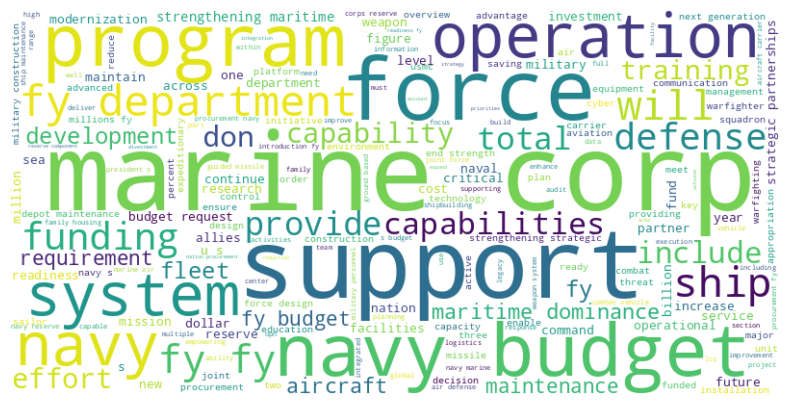

In [ ]:
#Generate a word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it clean
plt.show()

In [ ]:
!pip install bert-extractive-summarizer

Text Summarization

In [ ]:
from summarizer import Summarizer

In [ ]:
# Load model, this could take a while
model = Summarizer()
summary = model(text, min_length=60, max_length=500, ratio=0.05)  # Adjust these parameters as needed

In [ ]:
print("Summary of the document:")
print(summary)

In [ ]:
# prompt: summarize text in the "text" variable

# Load model, this could take a while
model = Summarizer()
summary = model(text, min_length=60, max_length=500, ratio=0.05)  # Adjust these parameters as needed
print("Summary of the document:")
print(summary)


In [ ]:
!pip install gensim

In [ ]:
from gensim import corpora, models

# Create a dictionary and corpus for topic modeling
dictionary = corpora.Dictionary(preprocessed_sentences)
corpus = [dictionary.doc2bow(text) for text in preprocessed_sentences]

# Apply LDA
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)


In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization")

# Assuming `text` contains the text extracted from the PDF
summary = summarizer(text)[0]["summary_text"]

print("Summary of the document:")
print(summary)

In [ ]:
import gensim
from gensim.summarization.summarizer import summarize

In [ ]:
summary = summarize(text)
print("Summary of the document:")
print(summary)


In [ ]:
!pip install openai

In [ ]:
!pip install python-dotenv
import dotenv
dotenv.load_dotenv('/content/drive/MyDrive/.env')

In [ ]:
# import openai_secret_manager

# assert "openai" in openai_secret_manager.get_services()
# secrets = openai_secret_manager.get_secret("openai")
import openai
openai.api_key = os.environ.get('OPEN_AI_KEY')

In [ ]:
text

In [ ]:
def split_text(text):
    max_chunk_size = 2048
    chunks = []
    current_chunk = ""
    for sentence in text.split("."):
        if len(current_chunk) + len(sentence) < max_chunk_size:
            current_chunk += sentence + "."
        else:
            chunks.append(current_chunk.strip())
            current_chunk = sentence + "."
    if current_chunk:
        chunks.append(current_chunk.strip())
    return chunks

In [ ]:
generate_summary(text)

In [ ]:
text

In [ ]:
sample= text[3000:4000]

In [ ]:
!pip install openai
import openai

In [ ]:


def generate_summary(text):
    input_chunks = text.split("\n")
    output_chunks = []
    for chunk in input_chunks:
        response = openai.completions.create(
            model="gpt-3.5-turbo",  # Replace with the desired model
            prompt=f"Please summarize the following text:\n{chunk}\n\nSummary:",
            temperature=0,
            max_tokens=100
        )
        output_chunks.append(response.choices[0].text)
    return "\n".join(output_chunks)

# Execute the function with the provided text
summary = generate_summary(sample)

# Print the summary
print(summary)